In [9]:
import networkx as nx 
import matplotlib.pyplot as plt 
import seaborn
%matplotlib inline

In [2]:
GA = nx.read_gexf('data/ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


### NetworkX with Matplotlib

Pros:
    
    - Easy
    - Some customisation 

Cons:

    - Looks 'dated' (not great for publication/productizing)
    - Not interactive 
    - Few layout options
    

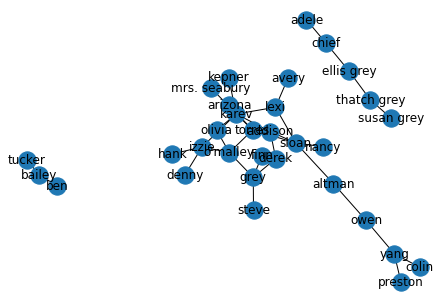

In [3]:
nx.draw(GA, with_labels=True)

Random layouts

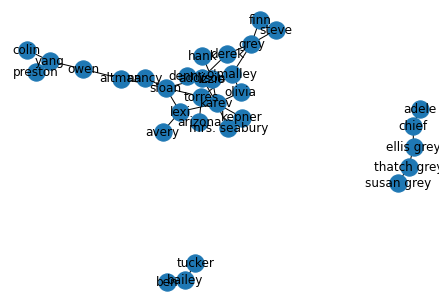

In [4]:
nx.draw(GA, with_labels=True)

### NetworkX detailed plotting

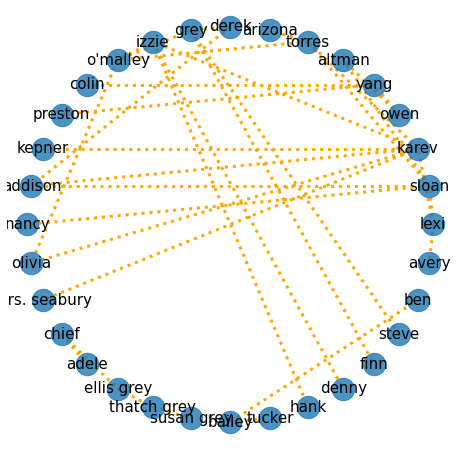

In [6]:
#Matplotlib options
plt.figure(figsize=(8,8))
plt.axis('off')

#generate layout and place nodes and edges
layout = nx.circular_layout(GA)

#plot nodes, edges and labels with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha = 0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted', edge_color = 'orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

plt.show()

### Detailed Plotting with Colors by Attribute

In [10]:
from seaborn import color_palette, set_style, palplot

In [12]:
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

In [14]:
nx.set_node_attributes(GA,dead_or_alive,'status')

In [22]:
def create_color_map(G, attribute, seaborn_palette='colorblind'):
    """Returns a list of hex color mappings for node attributes"""
    attributes = [G.nodes[label][attribute] for label in G.nodes()]
    #Get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    #generate color palette from seaborn
    palette = color_palette(seaborn_palette, num_values).as_hex()

    #create a mapping of attribute to color 
    color_map = dict(zip(attributes_unique,palette))

    #map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [23]:
node_colors, color_map, palette = create_color_map(GA, 'status')

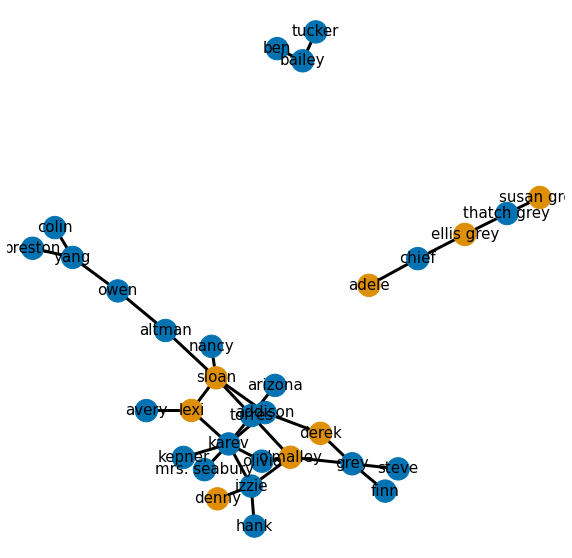

{'alive': '#0173b2', 'dead': '#de8f05'}


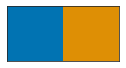

In [25]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

layout = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, layout, node_color = node_colors, node_size=500)
nx.draw_networkx_edges(GA, layout, width=3)
nx.draw_networkx_labels(GA, layout, font_size=15)

plt.show()

print(color_map)
palplot(palette)


Other Vizualization:
- plot.ly
- d3 
- gephi 
- cytoscape/ cyrest 
- python-igraph